## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout

# Disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = ""
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
DRP_RATIO = [0.5, 0.2]

In [7]:
results = {}
for dr in DRP_RATIO:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dr)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[str(dr)] = {'train_loss': train_loss,
                        'valid_loss': valid_loss,
                        'train_acc': train_acc,
                        'valid_acc': valid_acc}





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________

Epoch 25/30
50000/50000 [==============================] - 26s 529us/step - loss: 1.9498 - acc: 0.2647 - val_loss: 1.9867 - val_acc: 0.2777
Epoch 26/30
50000/50000 [==============================] - 23s 463us/step - loss: 1.9452 - acc: 0.2661 - val_loss: 1.9622 - val_acc: 0.2751
Epoch 27/30
50000/50000 [==============================] - 22s 446us/step - loss: 1.9504 - acc: 0.2664 - val_loss: 1.9428 - val_acc: 0.2999
Epoch 28/30
50000/50000 [==============================] - 19s 381us/step - loss: 1.9466 - acc: 0.2647 - val_loss: 1.9851 - val_acc: 0.2739
Epoch 29/30
50000/50000 [==============================] - 19s 377us/step - loss: 1.9411 - acc: 0.2664 - val_loss: 1.9595 - val_acc: 0.2838
Epoch 30/30
50000/50000 [==============================] - 19s 380us/step - loss: 1.9394 - acc: 0.2645 - val_loss: 1.9591 - val_acc: 0.2839
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)        

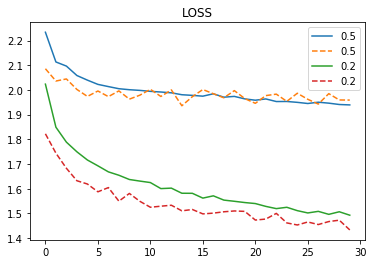

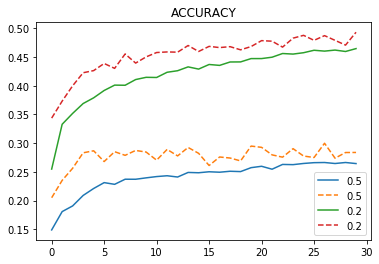

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train_loss'])), results[n]['train_loss'], '-', label=n)
    plt.plot(range(len(results[n]['valid_loss'])), results[n]['valid_loss'], '--', label=n)
    plt.legend()
    plt.title("LOSS")
plt.show()

for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train_acc'])), results[n]['train_acc'], '-', label=n)
    plt.plot(range(len(results[n]['valid_acc'])), results[n]['valid_acc'], '--', label=n)
    plt.legend()
    plt.title('ACCURACY')
plt.show()